In [1]:
import warnings

warnings.filterwarnings("ignore")
import os

if "jbook" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))
FORCE = True

(appendix:tqs)
# Text Quality Scoring Method

## Introduction
The **Text Quality Scoring Method**, inspired by state-of-the-art research {cite}`sharmaTextQualityBasedPruning2024`, is designed to assess the quality of textual content by combining two weighted components that capture distinct aspects of linguistic quality: **Syntactic Complexity** and **Perplexity**.

1. **Syntactic Complexity Score**:
   - This component evaluates the lexical richness of the text, focusing on aspects like **Part-of-Speech (POS) density, POS diversity, and sentence structure complexity**. By examining syntactic elements, this score captures how linguistically complex and detailed a text is.
   - A high Syntactic Complexity Score typically indicates a text rich in linguistic features, with varied sentence structures and a well-balanced mix of nouns, verbs, and modifiers (like adjectives and adverbs). This variety is particularly valuable for tasks like Aspect-Based Sentiment Analysis (ABSA), where lexical complexity can signal content with nuanced aspects and sentiments.

2. **Perplexity-Based Score**:
   - The Perplexity-Based Score measures the **predictability and coherence** of the text from the perspective of a language model. It reflects how well the text aligns with natural language patterns, as determined by a pre-trained model (e.g., GPT).
   - Lower perplexity implies higher fluency, coherence, and grammatical correctness, which are key indicators of text quality. This component is useful for flagging low-quality or noisy text that may be unpredictable or deviate significantly from standard linguistic norms.

Next, we provide further details on the **Syntactic Complexity** and **Perplexity-Based** quality measures.

---

## Syntactic Complexity Quality Measure
Syntactic complexity, defined as the range and sophistication of grammatical resources exhibited in language production, has been associated with increased review helpfulness {cite}`hineEffectsTextComplexity2015`. In Aspect-Based Sentiment Analysis (ABSA), high-quality text enables models to accurately parse and infer nuanced sentiment across diverse aspects, particularly within user-generated content such as app reviews. To maximize ABSA efficacy, reviews should exhibit syntactic richness in lexical diversity, lexical depth, and sentiment clarity. 

Here, we present a text quality scoring measure that leverages multiple linguistic and lexical dimensions to filter app reviews, ensuring that only those meeting high-quality standards are selected for analysis. 

The framework assigns a weighted quality score to each review based on five key components:
1. **POS Count (Content Volume)**
2. **POS Diversity (Lexical Variety)**
3. **Structural Complexity**
4. **POS Intensity (Sentiment Focus)**
5. **TQA Check (Formal Quality Indicators)**

Each component, described below, reflects syntactic and stylistic aspects that support ABSA objectives.

### 1. POS Count (Content Volume) — $(w_1 = 0.4)$

**Definition**: POS Count is a measure of the absolute quantity of content-bearing parts of speech, specifically nouns, verbs, adjectives, and adverbs. This component prioritizes reviews with a substantial volume of lexical material, directly supporting ABSA tasks by providing sufficient substance for identifying aspects and inferring nuanced sentiment.

**Formula**:
```{math}
:label: pos_count
\text{POS Count} = \text{nouns} + \text{verbs} + \text{adjectives} + \text{adverbs}
```

**Rationale**: In the context of ABSA, reviews with high POS Count are more likely to provide in-depth feedback, encompassing multiple app features and varied sentiment. This component, weighted at 0.4, serves as the primary driver of the quality score, reflecting its fundamental role in content adequacy. 


### 2. POS Diversity (Lexical Variety) — $( w_2 = 0.2 )$

**Definition**: POS Diversity assesses the variety and balance of POS tags within the text. It calculates how evenly nouns, verbs, adjectives, and adverbs are distributed, using a normalized entropy score to reflect balance across content-bearing parts of speech.

**Formula**:
$$
\text{POS Diversity} = - \sum_{i} \left( p_{i} \times \log(p_{i}) \right)
$$
where \( p_i \) represents the proportion of each POS type (nouns, verbs, adjectives, adverbs) within the text.

**Rationale**: Lexical variety enhances ABSA performance by increasing the probability that multiple aspects and sentiments are represented. Reviews with balanced POS usage are more likely to contain a mixture of descriptive, evaluative, and action-oriented language, which provides a richer substrate for aspect and sentiment extraction.



#### 3. Structural Complexity — $( w_3 = 0.2 )$

**Definition**: Structural Complexity evaluates the variability and engagement level within each review, capturing sentence length variability, unique word usage, and punctuation proportion. This component encourages reviews with intricate sentence structures and unique tokens, both of which signal a higher depth of content and engagement.

**Formula**:
$$
\text{Structural Complexity} = 0.25 \times \text{sentence\_length\_std} + 0.25 \times \text{p\_unique\_tokens} + 0.25 \times \text{p\_punctuation} + 0.25 \times \text{n\_sentences}
$$

where:
- **sentence\_length\_std**: Standard deviation of sentence lengths, capturing complexity.
- **p\_unique\_tokens**: Proportion of unique tokens, indicating lexical variety.
- **p\_punctuation**: Proportion of punctuation, reflecting sentence structuring.
- **n\_sentences**: Number of sentences, indicating text depth.

**Rationale**: This component complements POS Count and POS Diversity by capturing sentence-level structure and engagement, both of which improve ABSA’s ability to parse and infer multi-dimensional sentiment. Weighted at 0.2, Structural Complexity balances the need for structured yet diverse content.

### 4. POS Intensity (Sentiment Focus) — $( w_4 = 0.1 )$

**Definition**: POS Intensity measures the density of content-bearing words relative to total word count, emphasizing reviews where sentiment-laden and aspect-rich language predominates.

**Formula**:
$$
\text{POS Intensity} = \frac{\text{nouns} + \text{verbs} + \text{adjectives} + \text{adverbs}}{\text{total words}}
$$

**Rationale**: High POS Intensity suggests a focused, sentiment-rich review, where descriptive and evaluative language outweighs filler or redundant text. This complements POS Count by ensuring that content volume is matched with density, focusing on the substance of each review.


### 5. TQA Check (Formal Quality Indicators) — $( w_5 = 0.1 )$

**Definition**: The TQA Check evaluates the formal quality of the text, including punctuation and digit ratio, which signal professionalism and readability. TQA Check serves as a filter for overly simplistic or noisy text.

**Formula**:
$$
\text{TQA Check} = 0.3 \times (1 - \text{high\_digit\_ratio}) + 0.3 \times (1 - \text{high\_punctuation\_ratio}) + 0.4 \times \text{has\_terminal\_punctuation}
$$

**Rationale**: By enforcing basic formal standards, the TQA Check helps maintain a minimum quality threshold, reducing noise without strongly influencing content richness. It’s particularly useful for filtering out low-quality reviews that might otherwise distort ABSA performance.

### Overall Syntactic Complexity Quality Score Formula

The quality score $(Q)$ is defined as follows:

$$
Q = 0.4 \times \text{POS Count} + 0.2 \times \text{POS Diversity} + 0.2 \times \text{Structural Complexity} + 0.1 \times \text{POS Intensity} + 0.1 \times \text{TQA Check}
$$

where $( w_1, w_2, w_3, w_4, w_5)$ are weights representing the relative importance of each component. The weights are calibrated to prioritize content-rich reviews conducive to multi-aspect sentiment inference.


### Weight Allocation and Justification

The framework prioritizes **POS Count** due to its direct correlation with ABSA goals. POS Count holds the highest weight, as it ensures sufficient lexical volume, enabling richer and more varied sentiment and aspect extraction. POS Diversity and Structural Complexity are also assigned significant weights, as they enhance the scope and depth of analysis by ensuring reviews cover multiple aspects with well-structured expression. POS Intensity, Readability, and TQA Check receive supporting weights, contributing to focus, interpretability, and quality consistency without disproportionately influencing the quality assessment.

---

## Perplexity-Based Quality Measure

The perplexity-based quality assessment approach quantifies text quality using two main steps, combining multiple heuristics ({ref}`tqa_perplexity_heuristics`) that capture linguistic and syntactic characteristics:

1. **Weight Calculation**: Nine heuristic filters are used to evaluate various attributes of well-formed text, such as parse tree depth, word repetition ratio, text length, and the relationship between nouns and determiners. Each filter isolates a subset of the data that satisfies its criterion. Perplexity is then measured for both the filtered subsets and the original unfiltered dataset using a pre-trained language model (e.g., from HuggingFace).   The weight for each filter is calculated using:
   $$
   w_i = \max\left(0, \frac{\text{PPL}_{\text{all}} - \text{PPL}_i}{\text{PPL}_{\text{all}}}\right)
   $$
   where $(w_i)$ is the weight for the $(i)th$ filter, $(\text{PPL}_i)$ is the perplexity of the filtered subset, and $(\text{PPL}_{\text{all}})$ is the perplexity of the unfiltered dataset. Weights are set to zero if the perplexity increases.

```{table} Perplexity Heuristics
:name: tqa_perplexity_heuristics

| Heuristic                | Description                                                                                                           | Perplexity  | Weight      |
|--------------------------|-----------------------------------------------------------------------------------------------------------------------|-------------|-------------|
| Has Verb                 | Check if the text has at least one verb                                                                               | 4.389349461 | 0.06088662  |
| Has Determiner           | Check if the text has at least one determiner                                                                         | 4.46287775  | 0.045155041 |
| Word Repetition Ratio    | Check if ratio of repetition for wd in review exceeds 0.2                                                             | 4.503225803 | 0.036522464 |
| Has Noun                 | Check if the text has at least one noun                                                                               | 4.512285233 | 0.034584174 |
| Word Count Range         | Checkc of review word count is in range (3,256)                                                                       | 4.521953106 | 0.032515706 |
| Has Adjective            | Check if the text contains at least one adjective                                                                     | 4.546494961 | 0.027264909 |
| Stop Word Match          | Check if the review contains at least 2 stop words among 'the', 'be',   'to', 'of', 'and', 'that, 'have', and 'with'. | 4.549662113 | 0.026587288 |
| Has Adverb               | Check if the text contains at least one adverb                                                                        | 4.583549023 | 0.01933709  |
| Has Terminal Punctuation | Check if sentences end with ome of these punctuation marks: '-', '!',   '?', '"'.                                     | 4.651699066 | 0.004756201 |
```
The filters and their respective perplexities, and weights are listed in {ref}`tqa_perplexity_heuristics` and depicted below in order of magnitude.


In [ ]:
from genailab.flow.enrich.tqa.task import TQATask2
from genailab.infra.config.flow import FlowConfigReader
from genailab.core.flow import StageDef, PhaseDef

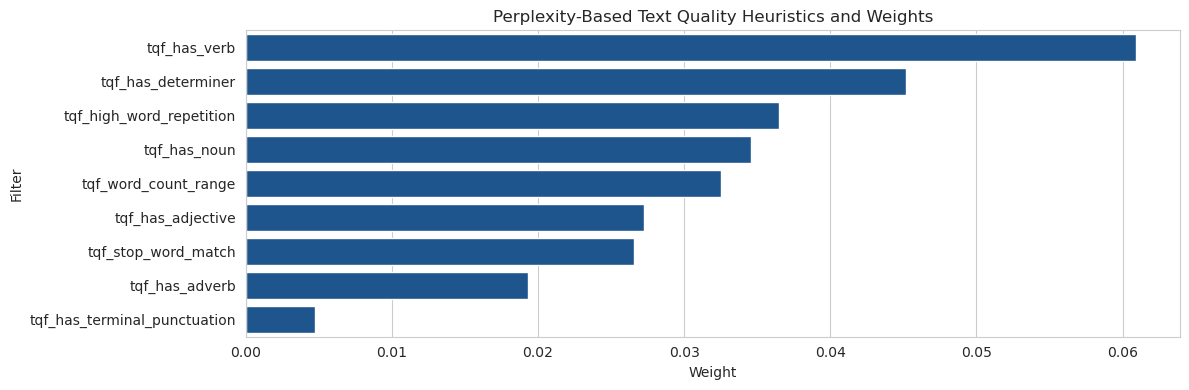

In [ ]:
config = FlowConfigReader().get_stage_config(
    phase=PhaseDef.ENRICHMENT, stage=StageDef.QUALITY
)
task = TQATask2(**config["tasks"][5]["params"])
task.plot_weights()


2. **Quality Scoring**: Each review is evaluated against all 9 filters, resulting in an indicator matrix. A quality score for each review is computed using:
   $$
   \text{score}_{\text{review}} = \frac{\sum_{i=1}^F w_i I_i(\text{review})}{\sum_{i=1}^F w_i}
   $$
   where $(w_i)$ is the filter weight, $(F)$ is the total number of filters, and $(I_i(\text{review}))$ is an indicator function showing whether the review meets the $(i)th$ filter’s criteria. 
   

---

## Final Review Text Quality Score
To create a balanced quality score, the Syntactic Complexity Score and Perplexity-Based Score are combined with tailored weights that emphasize their respective strengths. 

- **Syntactic Complexity Weight**: Typically given more weight when the task demands detailed and linguistically rich text, such as ABSA, where richer syntactic content improves aspect and sentiment extraction.
- **Perplexity-Based Weight**: Often assigned a moderate weight to capture coherence and fluency, ensuring that only grammatically sound and predictable text is prioritized without sacrificing syntactic diversity.

The final **Text Quality Score** is a weighted average of these two components, providing a single score that balances both syntactic richness and linguistic fluency. This composite score helps to prioritize high-quality text for downstream tasks, improving model performance by ensuring that selected text is both lexically complex and coherent. 
